In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DEMAND_DATA = 'half-hourly-system-demand-data-from-2-feb-2012-onwards.csv'
GHI_DATA = 'DRW_07-2019_06-2020_GHI.csv'
      
with open(DEMAND_DATA, 'r') as f:
  df = pd.read_csv(f)

with open(GHI_DATA, 'r') as f:
  ghi_df = pd.read_csv(f)

#print(df)
#print(ghi_df)

ghi_df = ghi_df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])

# GHI data is W/m2, the other one was a daily total of kWh/m2
print(ghi_df)

                    Time Timezone   GHI_AVG
0       01/07/2019 00:00     ACST -1.709617
1       01/07/2019 00:05     ACST -1.645382
2       01/07/2019 00:10     ACST -1.647309
3       01/07/2019 00:15     ACST -1.672195
4       01/07/2019 00:20     ACST -1.710447
...                  ...      ...       ...
104851  29/06/2020 01:35     ACST       NaN
104852  29/06/2020 01:40     ACST       NaN
104853  29/06/2020 01:45     ACST       NaN
104854  29/06/2020 01:50     ACST       NaN
104855  29/06/2020 01:55     ACST       NaN

[104856 rows x 3 columns]


In [3]:
# Let's calculate the power produced by 1m2 of solar panel.
# After using the stats for the solar panel (3)

# The solar panel has a width of 5550mm and a length of 37330mm
# The area is therefore 207.8 sq m.

# It produces 34.2 kWp at peak with 207.8 sqm which means that 
# the efficiency is 16.4%.
# That is for, 1kW/m2 of irradiance, you get 0.16kWp per m2 of the solar panel.

# There is also a is a 15% loss due to cloud cover, fouling, etc.

# Hence, the PVOUT average per GHI is equal to 

ghi_df['PVOUT_AVG'] = ghi_df['GHI_AVG'] * 0.164 * 0.85

print(ghi_df[288:577])

                 Time Timezone   GHI_AVG  PVOUT_AVG
288  02/07/2019 00:00     ACST -2.288212  -0.318977
289  02/07/2019 00:05     ACST -2.207044  -0.307662
290  02/07/2019 00:10     ACST -2.097399  -0.292377
291  02/07/2019 00:15     ACST -2.098669  -0.292554
292  02/07/2019 00:20     ACST -2.126001  -0.296364
..                ...      ...       ...        ...
572  02/07/2019 23:40     ACST -2.567105  -0.357854
573  02/07/2019 23:45     ACST -2.545830  -0.354889
574  02/07/2019 23:50     ACST -2.489317  -0.347011
575  02/07/2019 23:55     ACST -2.493965  -0.347659
576  03/07/2019 00:00     ACST -2.455383  -0.342280

[289 rows x 4 columns]


In [4]:
ghi_df['time'] = pd.to_datetime(ghi_df['Time'], dayfirst=True)
ghi_df = ghi_df[ghi_df['GHI_AVG'].notnull()]

In [5]:
# localise timezone to make timezone aware

ghi_df['time2'] = ghi_df['time'].dt.tz_localize(tz='Australia/Darwin')
ghi_df['time2'] = pd.DatetimeIndex(ghi_df['time2']).tz_convert(tz='Asia/Singapore')

In [6]:
print(ghi_df.dtypes)
ghi_df

Time                                 object
Timezone                             object
GHI_AVG                             float64
PVOUT_AVG                           float64
time                         datetime64[ns]
time2        datetime64[ns, Asia/Singapore]
dtype: object


,Time,Timezone,GHI_AVG,PVOUT_AVG,time,time2
0,01/07/2019 00:00,ACST,-1.709617,-0.238321,2019-07-01 00:00:00,2019-06-30 22:30:00+08:00
1,01/07/2019 00:05,ACST,-1.645382,-0.229366,2019-07-01 00:05:00,2019-06-30 22:35:00+08:00
2,01/07/2019 00:10,ACST,-1.647309,-0.229635,2019-07-01 00:10:00,2019-06-30 22:40:00+08:00
3,01/07/2019 00:15,ACST,-1.672195,-0.233104,2019-07-01 00:15:00,2019-06-30 22:45:00+08:00
4,01/07/2019 00:20,ACST,-1.710447,-0.238436,2019-07-01 00:20:00,2019-06-30 22:50:00+08:00
...,...,...,...,...,...,...
104846,29/06/2020 01:10,ACST,-3.244562,-0.452292,2020-06-29 01:10:00,2020-06-28 23:40:00+08:00
104847,29/06/2020 01:15,ACST,-3.319092,-0.462681,2020-06-29 01:15:00,2020-06-28 23:45:00+08:00
104848,29/06/2020 01:20,ACST,-3.338168,-0.465341,2020-06-29 01:20:00,2020-06-28 23:50:00+08:00
104849,29/06/2020 01:25,ACST,-3.238858,-0.451497,2020-06-29 01:25:00,2020-06-28 23:55:00+08:00


# New section

In [7]:
#plt.plot(dec_22_2019['time2'], dec_22_2019['PVOUT_AVG'])

In [8]:
# Let's plot a duck graph

df['datetime'] = df["date"] + " " + df["period_ending_time"]

df['time'] = pd.to_datetime(df["datetime"]).dt.tz_localize(tz="Asia/Singapore")

print(df)

x = pd.Timedelta(days=365*4)

df['time2'] = df['time'] + x

             date period_ending_time  system_demand_actual nem_demand_actual  \
0      2012-02-06              00:30               4526.68                na   
1      2012-02-06              01:00               4436.09                na   
2      2012-02-06              01:30               4361.24                na   
3      2012-02-06              02:00               4295.23                na   
4      2012-02-06              02:30               4233.17                na   
...           ...                ...                   ...               ...   
75931  2016-06-05              22:00               5862.00              5784   
75932  2016-06-05              22:30               5756.00              5684   
75933  2016-06-05              23:00               5674.00              5592   
75934  2016-06-05              23:30               5566.00              5486   
75935  2016-06-06              00:00               5446.00              5369   

      nem_demand_forecast          date

In [9]:
print(df.dtypes)
print(ghi_df.dtypes)

# This merge just chops off the 5 minute estimates...
mdf = pd.merge(df, ghi_df, on="time2", how='left')

date                                            object
period_ending_time                              object
system_demand_actual                           float64
nem_demand_actual                               object
nem_demand_forecast                             object
datetime                                        object
time                    datetime64[ns, Asia/Singapore]
time2                   datetime64[ns, Asia/Singapore]
dtype: object
Time                                 object
Timezone                             object
GHI_AVG                             float64
PVOUT_AVG                           float64
time                         datetime64[ns]
time2        datetime64[ns, Asia/Singapore]
dtype: object


In [10]:
# Convert actual system demand from megawatts to watts
mdf['system_demand_actual'] = mdf['system_demand_actual'] * 1e6

In [13]:
mdf

,date,period_ending_time,system_demand_actual,nem_demand_actual,nem_demand_forecast,datetime,time_x,time2,Time,Timezone,GHI_AVG,PVOUT_AVG,time_y,net_supply
0,2012-02-06,00:30,4.526680e+09,na,na,2012-02-06 00:30,2012-02-06 00:30:00+08:00,2016-02-05 00:30:00+08:00,NaN,NaN,NaN,NaN,NaT,NaN
1,2012-02-06,01:00,4.436090e+09,na,na,2012-02-06 01:00,2012-02-06 01:00:00+08:00,2016-02-05 01:00:00+08:00,NaN,NaN,NaN,NaN,NaT,NaN
2,2012-02-06,01:30,4.361240e+09,na,na,2012-02-06 01:30,2012-02-06 01:30:00+08:00,2016-02-05 01:30:00+08:00,NaN,NaN,NaN,NaN,NaT,NaN
3,2012-02-06,02:00,4.295230e+09,na,na,2012-02-06 02:00,2012-02-06 02:00:00+08:00,2016-02-05 02:00:00+08:00,NaN,NaN,NaN,NaN,NaT,NaN
4,2012-02-06,02:30,4.233170e+09,na,na,2012-02-06 02:30,2012-02-06 02:30:00+08:00,2016-02-05 02:30:00+08:00,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75931,2016-06-05,22:00,5.862000e+09,5784,5783,2016-06-05 22:00,2016-06-05 22:00:00+08:00,2020-06-04 22:00:00+08:00,04/06/2020 23:30,ACST,-3.947008,-0.550213,2020-06-04 23:30:00,-5.970832e+09
75932,2016-06-05,22:30,5.756000e+09,5684,5679,2016-06-05 22:30,2016-06-05 22:30:00+08:00,2020-06-04 22:30:00+08:00,05/06/2020 00:00,ACST,-4.161127,-0.580061,2020-06-05 00:00:00,-5.870736e+09
75933,2016-06-05,23:00,5.674000e+09,5592,5606,2016-06-05 23:00,2016-06-05 23:00:00+08:00,2020-06-04 23:00:00+08:00,05/06/2020 00:30,ACST,-3.350422,-0.467049,2020-06-05 00:30:00,-5.766382e+09
75934,2016-06-05,23:30,5.566000e+09,5486,5499,2016-06-05 23:30,2016-06-05 23:30:00+08:00,2020-06-04 23:30:00+08:00,05/06/2020 01:00,ACST,-3.906082,-0.544508,2020-06-05 01:00:00,-5.673704e+09


In [ ]:
x = pd.Timedelta(days=365*1)

df['time2'] = df['time'] + x

In [11]:
# Calculate the area necessary to meet peak demand
# The WHI or PVOUT average is in watts per squared meter.

# First restrict only to a single day.

ndf = mdf[mdf['time2'].between('2019-07-01', '2019-07-02')]

AREA = 0

for a in range(0, 10000000000, 100000):
  total_net_supply = (((ndf['PVOUT_AVG'] * a) - ndf['system_demand_actual']).sum()) /2
  #total_net_supply = (ndf['net_supply'].sum())
  #print(total_net_supply)
  if total_net_supply > 0:
    print("Supply exceeds demand")
    print((ndf['PVOUT_AVG'] * a).sum()/2)
    print((ndf['system_demand_actual']).sum()/2)
    print(total_net_supply)
    print(a)
    AREA = a
    break

# What's going on here? Makes no sense...

print("What's wrong with this?")

mdf['net_supply'] = ((mdf['PVOUT_AVG'] * AREA) - mdf['system_demand_actual'])
ndf = mdf[mdf['time2'].between('2019-07-01', '2019-07-02')]

print(ndf['GHI_AVG'].sum())

#print((mdf['PVOUT_AVG'] * AREA).sum())
#print((mdf['system_demand_actual']).sum())
#print((mdf['PVOUT_AVG'] * AREA).sum() - (mdf['system_demand_actual']).sum())
#print(((mdf['PVOUT_AVG'] * AREA) - (mdf['system_demand_actual'])).sum())

#print(mdf['net_supply'].sum())

#ndf
#ndf

Supply exceeds demand
148666008529.0656
148651500000.0
14508529.065638542
197800000
What's wrong with this?
10783.323047719003


AssertionError: <class 'numpy.ndarray'>

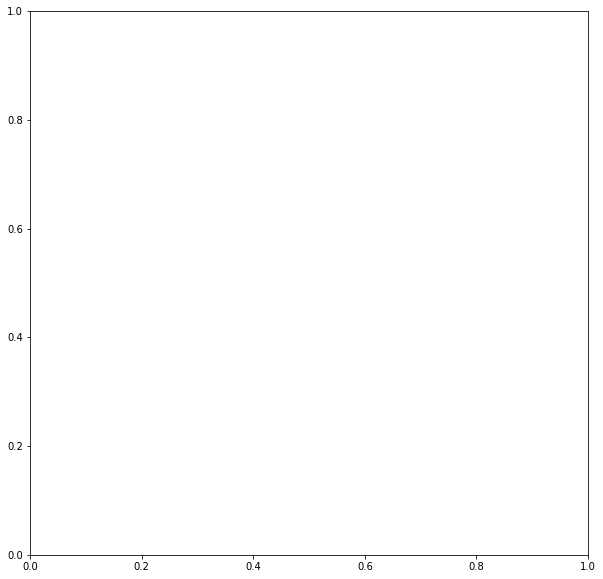

In [12]:
fig, ax = plt.subplots(figsize = [10,10])
plt.plot(ndf['time2'], ndf['PVOUT_AVG'] * AREA)
plt.plot(ndf['time2'], ndf['system_demand_actual'])
plt.plot(ndf['time2'], ndf['net_supply'])
ax.axhline(0, color='k')
ax.fill_between(ndf['time2'], 0, ndf['net_supply'], color = 'lightgreen')